# Lambda Functions

## Introduction

Lambda functions are often a convenient way to write *throw away* functions on the fly. If you need to write a more complicated function you may still need to use the more formal `def` method, but lambda functions provide a quick and concise way to write functions.

## Objectives
You will be able to:
* Understand what lambda functions are and why they are useful
* Use lambda functions to transform data within lists and DataFrames


## An Example

Let's say you want to count the number of words in each yelp review.

In [1]:
import pandas as pd
df = pd.read_csv('Yelp_Reviews.csv')
df.head(2)

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
1,2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g


In [2]:
df['text'].map(lambda x: len(x.split())).head()

0    58
1    30
2    30
3    82
4    32
Name: text, dtype: int64

Similar to defining functions in general or naming the iterable in for loops, the variable that you use after calling the `lambda` keyword does not matter

In [3]:
df['text'].map(lambda review_text: len(review_text.split())).head()

0    58
1    30
2    30
3    82
4    32
Name: text, dtype: int64

## Lambda functions with conditionals
Lambda functions can also accept some conditionals if chained in a list comprehension

In [4]:
df['text'].map(lambda x: 'Good' if any([word in x.lower() for word in ['awesome', 'love', 'good', 'great']]) else 'Bad').head()




0    Good
1     Bad
2    Good
3     Bad
4     Bad
Name: text, dtype: object

## Note
The above is terribly poor style and does in no way represent [pep-8](https://www.python.org/dev/peps/pep-0008/) or pythonic style. (For example, no line should be over 72 characters according to pep-8; the previous line was 127 characters.) That said, it is an interesting demonstration of chaining a conditional, the any method and a list comprehension all inside a lambda function!   
Shew!

## Returning to a more manageable example...

Perhaps we want to naively select the year from the date string rather then convert it to a datetime object.

In [5]:
df.date.map(lambda x: x[:4]).head()

0    2012
1    2014
2    2014
3    2011
4    2016
Name: date, dtype: object

## Lambda Functions are also useful within the sort method


In [6]:
#Without a key
names = ['Miriam Marks','Sidney Baird','Elaine Barrera','Eddie Reeves','Marley Beard',
         'Jaiden Liu','Bethany Martin','Stephen Rios','Audrey Mayer','Kameron Davidson',
         'Carter Wong','Teagan Bennett']
sorted(names)

['Audrey Mayer',
 'Bethany Martin',
 'Carter Wong',
 'Eddie Reeves',
 'Elaine Barrera',
 'Jaiden Liu',
 'Kameron Davidson',
 'Marley Beard',
 'Miriam Marks',
 'Sidney Baird',
 'Stephen Rios',
 'Teagan Bennett']

In [7]:
#Sorting by last name
names = ['Miriam Marks','Sidney Baird','Elaine Barrera','Eddie Reeves','Marley Beard',
         'Jaiden Liu','Bethany Martin','Stephen Rios','Audrey Mayer','Kameron Davidson',
'Teagan Bennett']
sorted(names, key=lambda x: x.split()[1])


['Sidney Baird',
 'Elaine Barrera',
 'Marley Beard',
 'Teagan Bennett',
 'Kameron Davidson',
 'Jaiden Liu',
 'Miriam Marks',
 'Bethany Martin',
 'Audrey Mayer',
 'Eddie Reeves',
 'Stephen Rios']

## A General Approach to Writing [Data Transformation] Functions

Above, we've covered a lot of the syntax of lambda functions, but the thought process for writing these complex transformations was not transparent. Let's take a minute to discuss some approaches to tackling these problems.

## Experiment and Solve for Individual Cases First

Before trying to write a function to apply to an entire series, its typically easier to attempt to solve for an individual case. For example, if we're trying to determine the number of words in a review, we can try and do this for a single review first.

First choose an example field that you'll be applying the function to.

In [8]:
example = df.text.iloc[0]
example

'I love this place! My fiance And I go here atleast once a week. The portions are huge! Food is amazing. I love their carne asada. They have great lunch specials... Leticia is super nice and cares about what you think of her restaurant. You have to try their cheese enchiladas too the sauce is different And amazing!!!'

Then start writing the function for that example. For example, if we need to count the number of words, it's natural to first divide the review into words. A natural way to do this is with the str.split() method. 

In [9]:
example.split()

['I',
 'love',
 'this',
 'place!',
 'My',
 'fiance',
 'And',
 'I',
 'go',
 'here',
 'atleast',
 'once',
 'a',
 'week.',
 'The',
 'portions',
 'are',
 'huge!',
 'Food',
 'is',
 'amazing.',
 'I',
 'love',
 'their',
 'carne',
 'asada.',
 'They',
 'have',
 'great',
 'lunch',
 'specials...',
 'Leticia',
 'is',
 'super',
 'nice',
 'and',
 'cares',
 'about',
 'what',
 'you',
 'think',
 'of',
 'her',
 'restaurant.',
 'You',
 'have',
 'to',
 'try',
 'their',
 'cheese',
 'enchiladas',
 'too',
 'the',
 'sauce',
 'is',
 'different',
 'And',
 'amazing!!!']

Then we just need to count this!

In [10]:
len(example.split())

58

## Then return to solving for all!

In [11]:
df.text.map(lambda x: len(x.split())).head()

0    58
1    30
2    30
3    82
4    32
Name: text, dtype: int64

## Watch for Edge Cases and Exceptions

When generalizing from a single case to all cases, it's important to consider exceptions or edge cases. For example, in the above example, you might wonder whether extra spaces or punctuations effects the output.

In [12]:
'this is a      weird test!!!Can we break it??'.split()

['this', 'is', 'a', 'weird', 'test!!!Can', 'we', 'break', 'it??']

As you can see, extra spaces won't break our fucntion, but missing a space after punctuation will. Perhaps this is a rare enough event that we don't worry further, but exceptions are always something to consider when writing functions.

## Other Common Patterns: the % and // operators

Another common pattern that you may find very useful is the modulus or remainder operator (%), as well as the floor division operator (//). These are both very useful when you want behavior such as 'every fourth element' or 'groups of three consecutive elements'. Let's investigate a couple of examples.

### The modulus operator (%)
Useful for queries such as 'every other element' or 'every fifth element' etc.

In [13]:
#Try a single example
3%2

1

In [14]:
2%2

0

In [19]:
#Generalize the pattern: every other
for i in range(10):
    print('i: {}, i%2: {}'.format(i, i%2))

i: 0, i%2: 0
i: 1, i%2: 1
i: 2, i%2: 0
i: 3, i%2: 1
i: 4, i%2: 0
i: 5, i%2: 1
i: 6, i%2: 0
i: 7, i%2: 1
i: 8, i%2: 0
i: 9, i%2: 1


### The floor division (//) operator
Useful for creating groups of a set size. For example: groups of ten, groups of seven, etc.

In [17]:
#Try a single example

In [20]:
9//3

3

In [21]:
5//3

1

In [22]:
#Generalize the pattern: every other
for i in range(10):
    print('i: {}, i//2: {}'.format(i, i//3))

i: 0, i//2: 0
i: 1, i//2: 0
i: 2, i//2: 0
i: 3, i//2: 1
i: 4, i//2: 1
i: 5, i//2: 1
i: 6, i//2: 2
i: 7, i//2: 2
i: 8, i//2: 2
i: 9, i//2: 3


### Combining % and //

Combining the two can be very useful, such as when creating subplots!
Below we iterate through 12 elements arranging them into 3 rows and 4 columns.

In [23]:
for i in range(12):
    print('i: {}, Row: {} Column: {}'.format(i, i//4, i%4))

i: 0, Row: 0 Column: 0
i: 1, Row: 0 Column: 1
i: 2, Row: 0 Column: 2
i: 3, Row: 0 Column: 3
i: 4, Row: 1 Column: 0
i: 5, Row: 1 Column: 1
i: 6, Row: 1 Column: 2
i: 7, Row: 1 Column: 3
i: 8, Row: 2 Column: 0
i: 9, Row: 2 Column: 1
i: 10, Row: 2 Column: 2
i: 11, Row: 2 Column: 3


In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

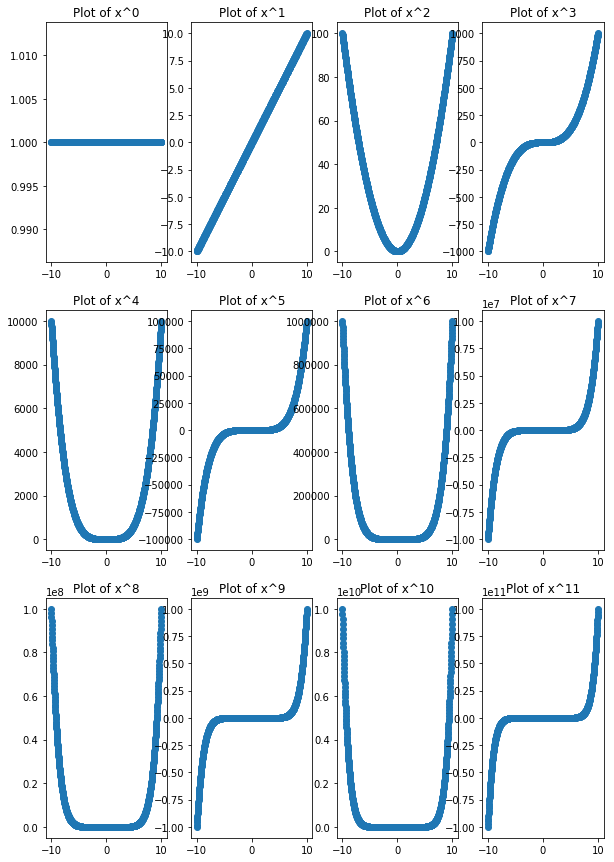

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,15))
x = np.linspace(start=-10, stop=10, num=10*83)
for i in range(12):
    row = i//4
    col = i%4
    ax = axes[row, col]
    ax.scatter(x, x**i)
    ax.set_title('Plot of x^{}'.format(i))
plt.show()

## Summary

Lambda functions can be a convenient way to write "throw away" functions that you want to declare inline. In the next lesson we'll give you some practice with creating them!